In [49]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv ('games_data.csv')
data = df.to_numpy()
X = data[:100 , [1,2,3,4,5,8,9,10,11,12,13]]
y = data[:100 , 6]

X_val = data[103:129, [1,2,3,4,5,8,9,10,11,12,13]]
y_val = data[103:129, 6]

In [51]:
for i in range(X.shape[0]):
    X[i][0] = len(X[i][0])

for i in range(X_val.shape[0]):
    X_val[i][0] = len(X_val[i][0])

In [52]:
y_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y.shape[0]):
    if y[i] >= 2.5:
        y_encoded.append(1)
    else:
        y_encoded.append(0)

In [53]:
scaler = PolynomialFeatures(3)
X= scaler.fit_transform(X)
X_val = scaler.transform(X_val)

In [54]:
training_model = MLPClassifier(solver='adam', alpha=0.0001, hidden_layer_sizes=(5, 2), random_state=1, activation='tanh')

In [55]:
training_model.fit(X, y_encoded)

MLPClassifier(activation='tanh', hidden_layer_sizes=(5, 2), random_state=1)

In [56]:
y_val_encoded = [] #using Neural Networking, categorize the game to success or not. 
for i in range(y_val.shape[0]):
    if y[i] >= 2.5:
        y_val_encoded.append(1)
    else:
        y_val_encoded.append(0)
print(X_val.shape[0])

26


In [57]:
result = training_model.predict(X_val)
print(result)
print(y_val_encoded)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1]


In [58]:
sum = 0
for i in range(X_val.shape[0]):
    if result[i] == y_val_encoded[i]:
        sum += 1
accuracy = sum/X_val.shape[0]
print(accuracy)

0.8461538461538461


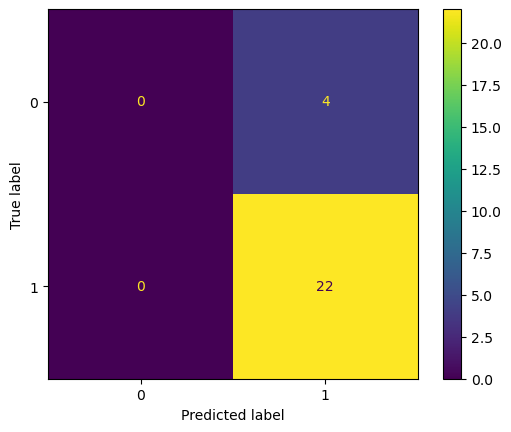

In [59]:
ConfusionMatrixDisplay.from_predictions(y_val_encoded, np.array(result))
plt.show()

/Users/yujunlu/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


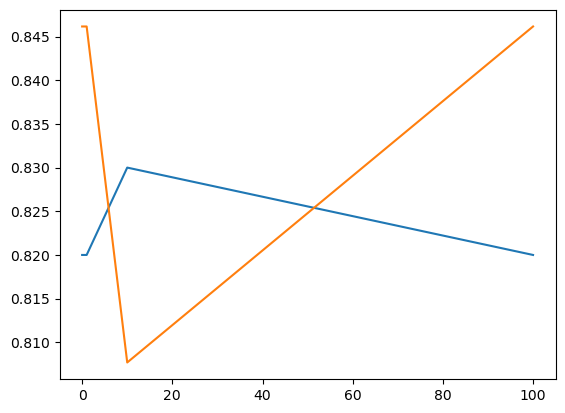

In [60]:
plot_x = [0.001]
start_c = 0.001
for i in range(5):
    start_c *= 10
    plot_x.append(start_c)
plot_y = []
plot_val_y = []
for each in plot_x:
    training_model1 = MLPClassifier(solver='adam', alpha=each, hidden_layer_sizes=(5, 2), random_state=1, activation='tanh')
    training_model1.fit(X, y_encoded)
    score = training_model1.score(X,y_encoded)
    plot_y.append(score)
    score2 = training_model1.score(X_val,y_val_encoded)
    plot_val_y.append(score2)
plt.plot(plot_x, plot_y)
plt.plot(plot_x, plot_val_y)